In [388]:
# Assistant
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import matplotlib's pyplot for creating static visualizations
import matplotlib.pyplot as plt
# Import seaborn for enhanced statistical data visualizations
import seaborn as sns
import datetime as dt

In [133]:
import pandas as pd

# Load Airbnb listings data from CSV file
df = pd.read_csv(
    'File_path',
    encoding="ISO-8859-1",  # Specify character encoding for the file
    low_memory=False,       # Avoid memory issues with large files
    #usecols=[1, 2, 3],     # Commented out code to select specific columns
    parse_dates=["host_since"]  # Convert 'host_since' column to datetime objects
)

In [134]:
# Display the first 5 rows of the dataframe to get a quick overview of the data structure
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [139]:
# Get a list of all column names in the DataFrame 'df'
df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [143]:
# Filter the dataframe to get rows where city is "Paris" and select specific columns:
# host_since: when the host joined
# city: the city name (will all be "Paris" in this filtered dataframe)
# neighbourhood: the neighborhood within Paris
# accommodates: number of guests the listing can accommodate
# price: the price of the listing
pl=df.loc[df['city'] == "Paris",["host_since","city","neighbourhood","accommodates","price"]]

In [61]:
# Check for missing values in the dataframe 'pl'
# Returns a Series with the count of null values for each column
pl.isnull().sum()

host_since       33
city              0
neighbourhood     0
accommodates      0
price             0
dtype: int64

In [65]:
pl.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [95]:
len(pl[pl["accommodates"]==0])

54

In [97]:
pl[pl["price"]==0].shape[0]

62

In [113]:
len(pl[(pl["accommodates"]==0) & (pl["price"]==0)])

54

# objectives 2 : Creating DataFrames

# 1.Create a DataFrame called paris_listings_neighbourhood. Group the Paris listings by neighbourhood and calculate the average price for each. Sort by price in ascending order.

In [275]:
# pl.groupby("neighbourhood")["price"].agg("mean")
# pl_neigh=pl.groupby("neighbourhood")["price"].mean()
# Group data by neighborhood and calculate mean price for each neighborhood
# Then sort neighborhoods by price in descending order and reset index to get a clean DataFrame
# pl_neigh will contain neighborhoods sorted from most expensive to least expensive
pl_neigh=(pl.groupby("neighbourhood").agg({"price":"mean"}).sort_values(by="price",ascending=False).reset_index())

In [277]:
pl_neigh.head()

,neighbourhood,price
0,Elysee,210.536765
1,Louvre,175.379972
2,Passy,161.144635
3,Palais-Bourbon,156.856578
4,Luxembourg,155.638639


## 2.Create a DataFrame called `paris_listings_accomodations`. Filter your data down to the most expensive neighbourhood in Paris. Group it by `accomodates` and calculate the average price for each. Sort by price in ascending order.


In [340]:
# Filter data for "Elysee" neighborhood, then group by number of accommodated guests
# Calculate mean price for each accommodation size, sort in descending order by price
# Reset index to convert the groupby object back to a regular DataFrame
pl_acco=pl.loc[pl["neighbourhood"]=="Elysee"].groupby("accommodates").agg({"price":"mean"}).sort_values(by="price",ascending=False).reset_index()

In [342]:
# Convert the 'accommodates' column from numeric to string type
# This is often done for categorical processing or when preparing data for certain visualizations
pl_acco["accommodates"]=pl_acco["accommodates"].astype(str)

In [344]:
pl_acco.head()

,accommodates,price
0,14,971.000
1,13,842.500
2,11,805.000
3,16,800.000
4,12,529.625


## 3.Finally, create a DataFrame called `paris_listings_over_time`. Group the data by the year component of `host_since`. Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each year.

In [378]:
# Create a time series analysis of listings by:
# 1. Setting the index to "host_since" column to enable time-based operations
# 2. Resampling data by year ("Y")
# 3. Aggregating to count listings per neighborhood and calculate average price
# 4. Resetting the index to convert back to a regular DataFrame with "host_since" as a column
pl_change_ovr_time=pl.set_index("host_since").resample("Y").agg(Count=("neighbourhood","count"),Avg_price=("price","mean")).reset_index()

In [390]:
# Convert the 'host_since' datetime column to just the year component, then convert to string type
pl_change_ovr_time["host_since"] = pl_change_ovr_time["host_since"].dt.year.astype(str)

In [392]:
pl_change_ovr_time.head()

,host_since,Count,Avg_price
0,2008,4,77.750000
1,2009,106,159.641509
2,2010,416,125.031250
3,2011,1339,124.828230
4,2012,4592,111.578615


# objective 3 : Visualizing the Data

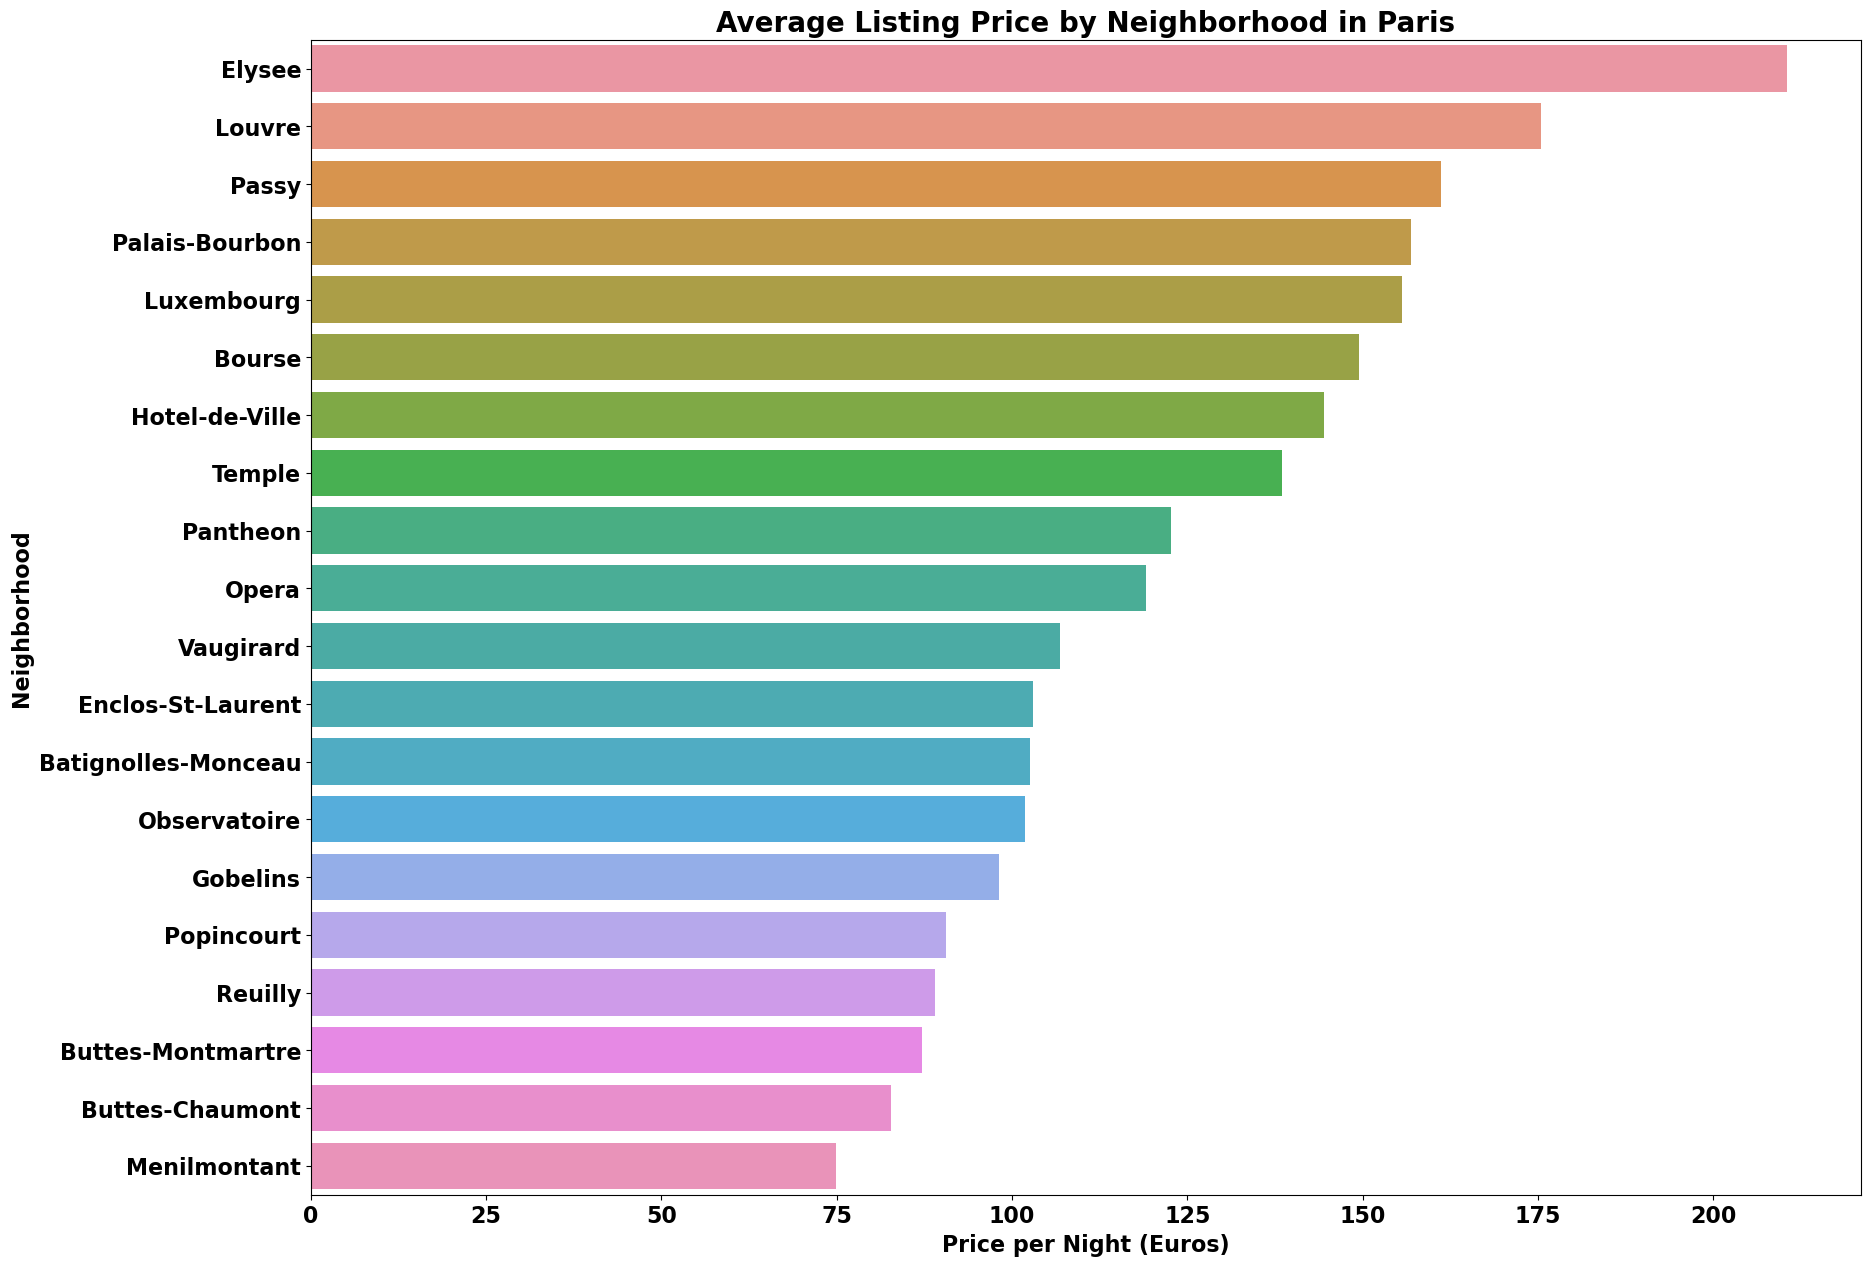

In [374]:
# Create a figure with specified size (width=20, height=15 inches)
plt.figure(figsize=(20,15))
# Create a bar plot showing average price by neighborhood using seaborn
sns.barplot(data=pl_neigh, y="neighbourhood", x="price")
# Add a title to the plot with custom font size and weight
plt.title("Average Listing Price by Neighborhood in Paris", fontsize=20, fontweight='bold')
# Customize x-axis tick labels
plt.xticks(fontsize=16, fontweight='semibold')
# Customize y-axis tick labels
plt.yticks(fontsize=16, fontweight='semibold')
# Add y-axis label with custom formatting
plt.ylabel("Neighborhood", fontsize=16, fontweight='semibold')
# Add x-axis label with custom formatting
plt.xlabel("Price per Night (Euros)", fontsize=16, fontweight='semibold')
# Display the plot
plt.show()

# Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood.Make sure to add a title and change axis labels as needed.


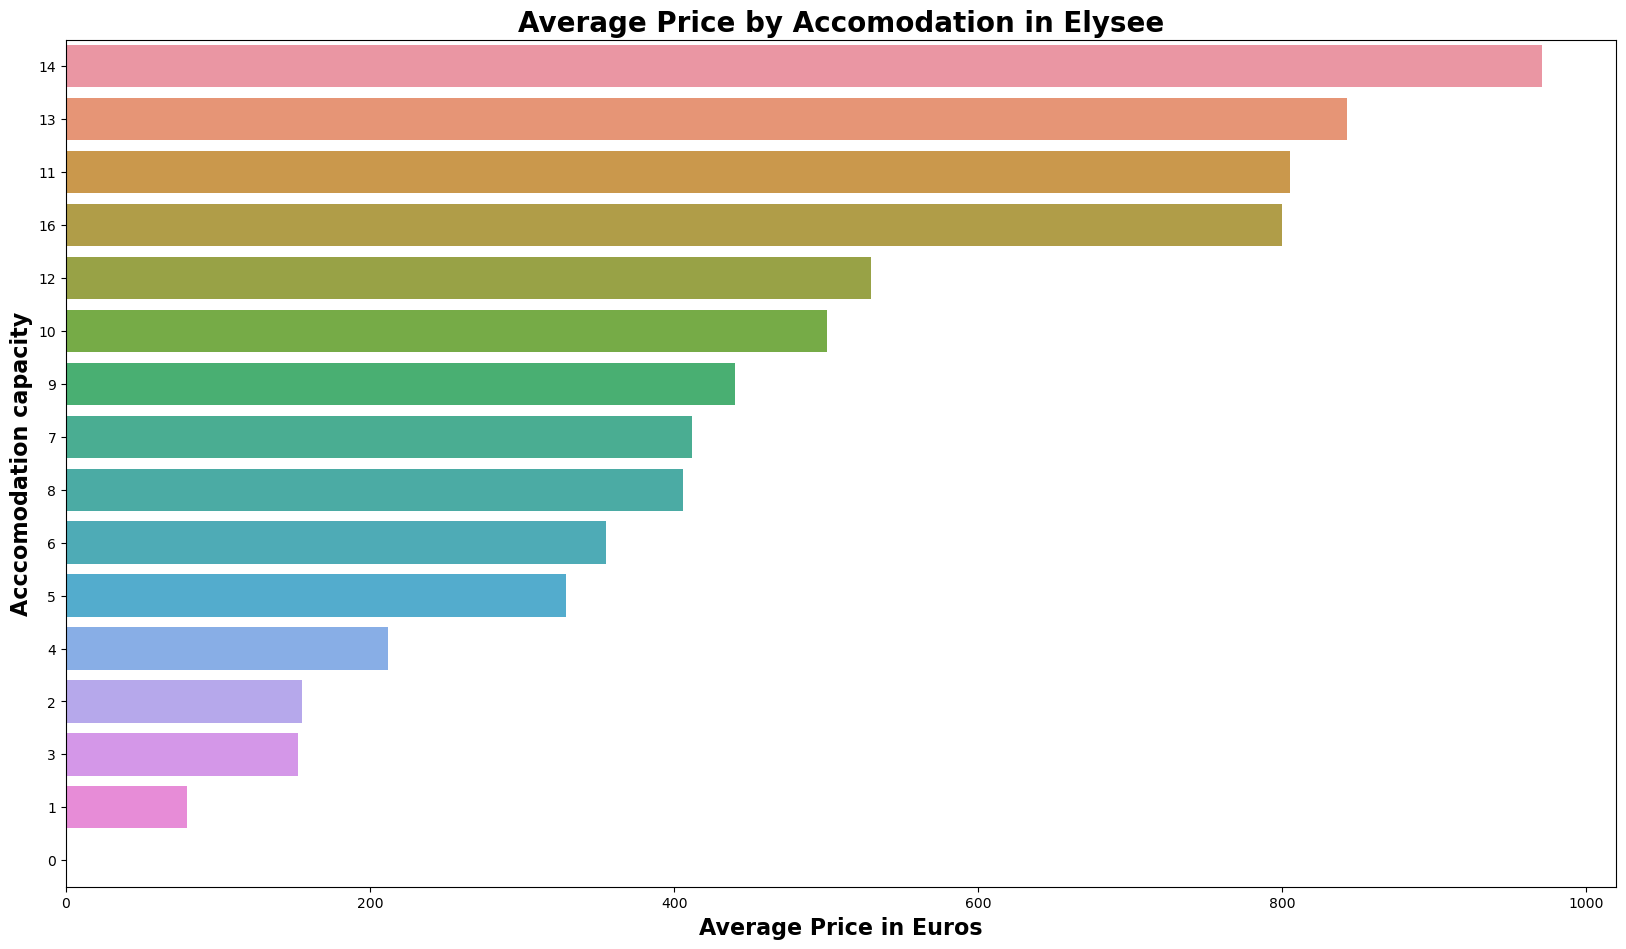

In [368]:
# Create a figure with specified size (width=20, height=11 inches)
plt.figure(figsize=(20,11))
# Create a bar plot showing the relationship between accommodation capacity and price
sns.barplot(data=pl_acco, y="accommodates", x="price")
# Add a title to the plot with custom font size and weight
plt.title("Average Price by Accomodation in Elysee", fontsize=20, fontweight='bold')
# Label the y-axis with custom font size and weight
plt.ylabel("Acccomodation capacity", fontsize=16, fontweight='bold')
# Label the x-axis with custom font size and weight
plt.xlabel("Average Price in Euros", fontsize=16, fontweight='bold')
# Display the plot
plt.show()

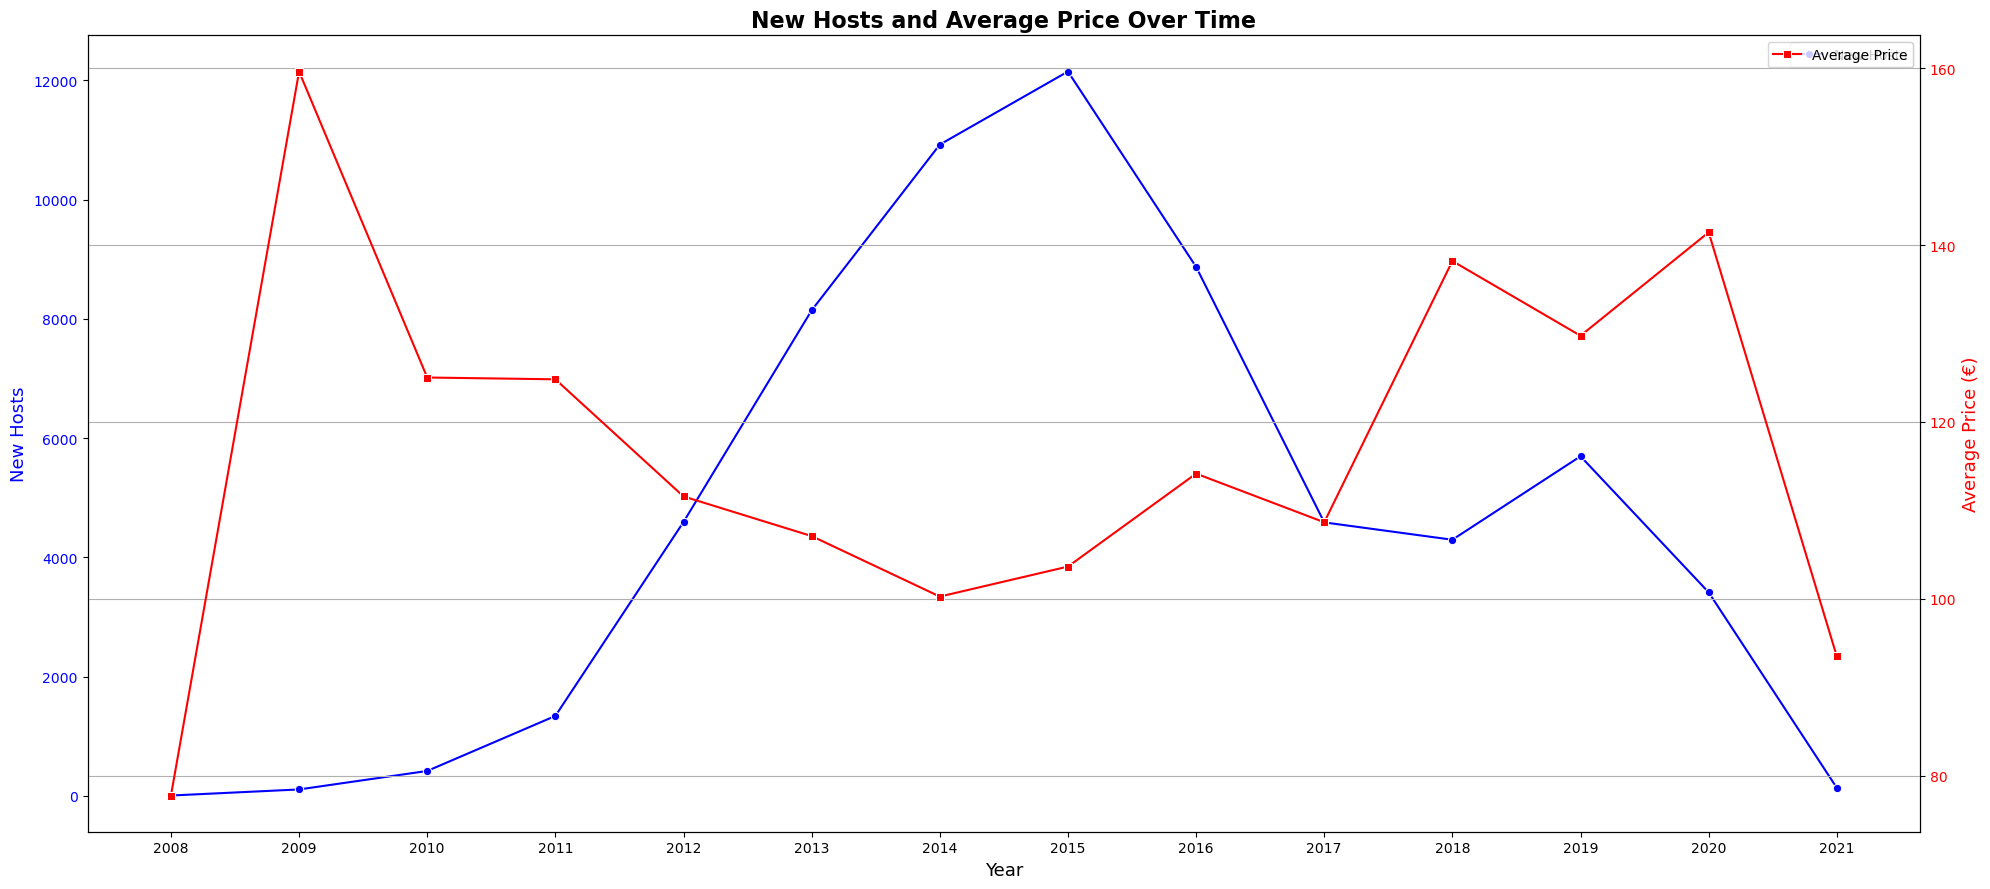

In [437]:
fig, ax1 = plt.subplots(figsize=(20, 9))  # Create figure and primary axis with specified size

# First y-axis: New Hosts
ax1.set_xlabel("Year", fontsize=13)  # Set x-axis label with font size
ax1.set_ylabel("New Hosts", color="blue", fontsize=13)  # Set primary y-axis label with color and font size
sns.lineplot(data=pl_change_ovr_time, x="host_since", y="Count", ax=ax1, label="New Hosts", color="blue", marker='o')  # Plot new hosts count with blue line and circle markers
ax1.tick_params(axis="y", labelcolor="blue")  # Set y-axis tick color to match the line

# Second y-axis: Average Price
ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis
ax2.set_ylabel("Average Price (€)", color="red", fontsize=13)  # Set secondary y-axis label with color and font size
sns.lineplot(data=pl_change_ovr_time, x="host_since", y="Avg_price", ax=ax2, label="Average Price", color="red", marker='s')  # Plot average price with red line and square markers
ax2.tick_params(axis="y", labelcolor="red")  # Set secondary y-axis tick color to match the line

# Add Title
ax1.set_title("New Hosts and Average Price Over Time", fontsize=16, fontweight="bold")  # Set plot title with formatting

# Layout and Grid
fig.tight_layout()  # Adjust subplot parameters to give specified padding
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the plot